In [56]:
# importing libs
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [57]:
# Data storage in dataframe
df = pd.read_csv('CIDDS.csv')

In [58]:
# Show data head
df.head()

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-14 17:43:57.172,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,1,.AP...,0,normal,---,---,---
1,2017-03-14 17:43:57.172,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,1,.AP...,0,normal,---,---,---
2,2017-03-14 17:43:26.135,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,1,.AP...,0,normal,---,---,---
3,2017-03-14 17:43:26.135,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,1,.AP...,0,normal,---,---,---
4,2017-03-14 18:17:09.005,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,1,.AP.S.,0,normal,---,---,---


In [59]:
# show number rows and columns
df.shape 

(172838, 16)

In [60]:
# show columns names
df.columns

Index(['Date first seen', 'Duration', 'Proto', 'Src IP Addr', 'Src Pt',
       'Dst IP Addr', 'Dst Pt', 'Packets', 'Bytes', 'Flows', 'Flags', 'Tos',
       'class', 'attackType', 'attackID', 'attackDescription'],
      dtype='object')

In [61]:
# Checking for NULL values
df.isnull().sum()

Date first seen      0
Duration             0
Proto                0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flows                0
Flags                0
Tos                  0
class                0
attackType           0
attackID             0
attackDescription    0
dtype: int64

In [62]:
# show data type for each column
df.dtypes

Date first seen       object
Duration             float64
Proto                 object
Src IP Addr           object
Src Pt                 int64
Dst IP Addr           object
Dst Pt               float64
Packets                int64
Bytes                 object
Flows                  int64
Flags                 object
Tos                    int64
class                 object
attackType            object
attackID              object
attackDescription     object
dtype: object

In [63]:
# view the values in the class
df["class"].unique()

array(['normal', 'suspicious', 'unknown'], dtype=object)

<AxesSubplot:>

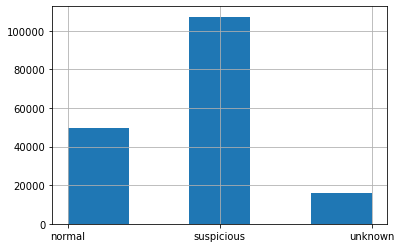

In [64]:
# visual class
df['class'].hist(bins=5)

<AxesSubplot:xlabel='class', ylabel='count'>

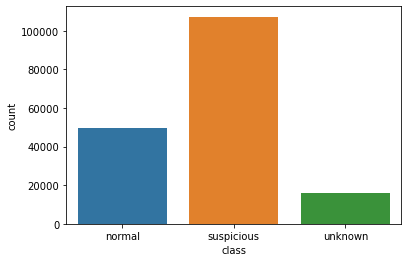

In [65]:
sns.countplot(x = "class",data=df)

In [ ]:
sns.pairplot(df, hue='class');

C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\muteb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

In [ ]:
# split flag
def set_flag(data,check):
    i=0;
    if(check in list(data["Flags"])):
        i = 1 ;
    return i;

In [ ]:
df["A"] = df.apply(set_flag,check ="A", axis = 1)
df["P"] = df.apply(set_flag,check = "P" ,axis = 1)
df["S"] = df.apply(set_flag,check ="S",axis = 1)
df["R"] = df.apply(set_flag,check="R" ,axis = 1)
df["F"] = df.apply(set_flag,check ="F" ,axis = 1)
df["x"] = df.apply(set_flag,check ="x" ,axis = 1)

In [ ]:
df.columns

In [ ]:
sns.countplot(x="A",hue ="class",data=df)

In [ ]:
sns.countplot(x ="Proto",hue ="class",data=df)

In [ ]:
# 
import re
def convot(data):
    num1=data["Bytes"]
    if "M" in data["Bytes"]:
        num=re.findall("[0-9.0-9]",data["Bytes"])
        num1 = float("".join(num))*100000
    num1 = float(num1)
    return num1

In [ ]:
df["Bytes"] = df.apply(convot,axis = 1)

In [ ]:
df.head()

In [ ]:
df=df.drop(columns = ["Date first seen","attackType","attackID","attackDescription","Flows","Tos","Flags"])

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
col = ["Proto","class","Src IP Addr","Dst IP Addr"]
en = LabelEncoder()
for colname in col:
    df[colname]=en.fit_transform(df[colname])

In [ ]:
df.head()

In [ ]:
df.dtypes

# Model

In [ ]:
from sklearn.model_selection import train_test_split
y = df["class"]
x = df.drop(columns = ["class"])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier() 
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [ ]:
acc = dtc.score(X_test, y_test)

print("Accuracy: {:.2f}%".format(acc * 100))

In [ ]:
sample_input = pd.DataFrame(pd.Series({
    'Duration': 0.000,
    'Proto': 2,
    'Src IP Addr': 23,
    'rc Pt': 65,
    'Dst IP Addr': 7,
    'Dst Pt': 96978.0,
    'Packets': 12024,
    'Bytes': 5720000.0,
    'A': 0,
    'P': 0,
    'S': 0,
    'R': 1,
    'F': 1,
    'x': 1,
})).T

prediction = dtc.predict(sample_input)
print("Class:", prediction)